# Pandas
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From http://pandas.pydata.org/pandas-docs/stable/

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

See also:

* https://github.com/restrepo/data-analysis
  * https://classroom.github.com/g/sSMBdBqN
  * https://classroom.github.com/a/PcbQBE7F
* https://github.com/restrepo/PythonTipsAndTricks
* https://pbpython.com/excel-pandas-comp.html [[archive.org](https://web.archive.org/web/20201126143453/https://pbpython.com/excel-pandas-comp.html)]

Good and practice books about `Pandas` possibilities are:


[__Python for Data Analysis__](https://drive.google.com/open?id=0BxoOXsn2EUNIWExXbVc4SDN0YTQ)<br/>
Data Wrangling with Pandas, NumPy, and IPython<br/>
_By William McKinney_


This other is about aplications based on `Pandas`:
![image.png](https://covers.oreillystatic.com/images/0636920030515/cat.gif) [Introduction to Machine Learning with Python](https://drive.google.com/open?id=0BxoOXsn2EUNISGhrdEZ3S29fS3M)<br/>
A Guide for Data Scientists
By Sarah Guido, Andreas Müller

[Python Books](https://drive.google.com/drive/u/0/folders/0BxoOXsn2EUNIUFFUWUkxd0JSVFk?resourcekey=0-Eo6AxHgut_mZ1-M3vD10oQ)

`Pandas` can be used in a similar way to `R`, which is based on similar data structures. `Pandas` also can replace the use of graphical interfaces to access spreadsheets like Excel. In particular, can be used in joint with the module [`xlsxwriter`](https://xlsxwriter.readthedocs.io/tutorial02.html) to produce professional Excel spreadsheets at the programatical level.

The similar data structure in Wolfram Alpha and Mathematica is  the `Dataset`, in C++ is the ROOT framework, and in the old Fortran 77 was `paw`. In this way, a dictionary of equivalent commands can be stablished between the several frameworks

## Standard way to load the module

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Basic structure: DataFrame

An flat _spreadsheet_ can be seen in terms of the types of variables of `Python` just as dictionary of lists, where each column of the spreadsheet is a pair key-list of the dictionary 

|   |  A   |  B   |
|---|:----:|:----:|
| 1 | even | odd  |
| 2 |   0  | 1    |
| 3 |   2  | 3    |
| 4 |   4  | 5    |
| 5 |   6  | 7    |
| 6 |   8  | 9    |

In [2]:
numbers={"even": [0,2,4,6,8],   #  First  key-list
         "odd" : [1,3,5,7,9] }  #  Second key-list

## Data structures

`Pandas` has two new data structures:
1. `DataFrame` which are similar to numpy arrays but with some assigned key. For example, for the previous case
```python
import numpy as np
np.array([[0,1],
          [2,3],
          [4,5],
          [6,7],
          [8,9] 
         ])
```
1. `Series` which are enriched  to dictionaries, as the ones defined for the rows of the previous example: `{'even':0,'odd':1}`.




The rows in a two-dimensional `DataFrame` corresponds to `Series` with similar keys, while the columns are also Series with the indices as keys. 

An example of a  `DataFrame` is a spreadsheet, as the one before.

### `DataFrame`
`Pandas` can convert a dictionary of lists, like the `numbers` dictionary before, into a `DataFrame`, which is just an spreadsheet but interpreted at the programming level:



In [3]:
numbers

{'even': [0, 2, 4, 6, 8], 'odd': [1, 3, 5, 7, 9]}

In [4]:
import pandas as pd
df=pd.DataFrame(numbers)
df

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


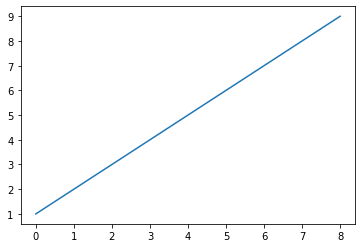

In [7]:
plt.plot(df['even'],df['odd'])

It is equivalent to:

In [8]:
df.to_dict()

{'even': {0: 0, 1: 2, 2: 4, 3: 6, 4: 8}, 'odd': {0: 1, 1: 3, 2: 5, 3: 7, 4: 9}}

In [9]:
pd.DataFrame(  {'even': {0: 0, 1: 2, 2: 4, 3: 6, 4: 8}, 'odd': {0: 1, 1: 3, 2: 5, 3: 7, 4: 9}} )


,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [10]:
pd.DataFrame.from_dict(numbers)

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


See below for other possibilities of [creating Pandas DataFrames from lists and dictionaries](https://fisica.udea.edu.co:4443/user/restrepo/notebooks/prog/cursos/data-analysis/Pandas.ipynb#Intialization-from-lists-and-dictionaries)

The main advantage of the `DataFrame`, `df`, is that it can be managed without a graphical interface.

We can check the shape of the `DataFrame`

In [11]:
df.shape

(5, 2)

####  Export DataFrame to other formats
* To export to excel:

In [12]:
df.to_excel('example.xlsx',index=False)

In [13]:
newdf=pd.read_excel('example.xlsx')
newdf

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


__Activity__: Open the resulting spreadsheet in Google Drive, publish it and open from the resulting link with Pandas in the next cell

In [14]:
df=pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vQP-CabpvmHEP4W5oH2OQ4HZU15oGD01DSoghbkRuRMoEHEI4oMO4OuTekRroLdTw/pub?output=xlsx')
df

,even,odd
0,0.0,1.0
1,2.0,3.0
2,4.0,5.0
3,6.0,7.0
4,8.0,9.0


### `Series`

Each column of the DataFrame is now an augmented dictionary called `Series`, with the indices as the keys of the `Series`

A `Pandas` `Series` object can be just initialized from a `Python` dictionary:

In [15]:
type( df['even'] )

pandas.core.series.Series

The keys are the index of the `DataFrame`

In [16]:
#df['even']
df.even[4]

8.0

Each row is also a series

In [17]:
df.loc[0]

even    0.0
odd     1.0
Name: 0, dtype: float64

with keys: `'even'` and `'odd'`

In [18]:
df.loc[0]['even']

0.0

or attributes `even` and `odd`

In [19]:
df.loc[0].odd

1.0

One specific cell value can be reached with the index and the key:

In [20]:
df.loc[2,'odd']

5.0

In [21]:
df.at[2,'even']

4.0

In [22]:
s=pd.Series({'Name':'Juan Valdez','Nacionality':'Colombia','Age':23})
s

Name           Juan Valdez
Nacionality       Colombia
Age                     23
dtype: object

*Note* that the key name can be used also as an attribute.


In [23]:
df.odd

0    1.0
1    3.0
2    5.0
3    7.0
4    9.0
Name: odd, dtype: float64

> The __power__ of Pandas rely in that their main data structures: `DataFrames` and `Series`, are enriched with many useful methods and attributes.

### [Official definition of Pandas](http://pandas.pydata.org/pandas-docs/stable/)

> Pandas is a Python package providing __fast__, __flexible__, and __expressive__ _data structures_ designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it _has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool_ available in any language. It is already well on its way toward this goal.

* "relational": the list of data is identified with some unique index (like a `SQL` table)
* "labeled": the list is identified with a key, like the previous `odd` or `even` keys.


For example. A double bracket `[[...]]`, can be used to filter data.

A row in a two-dimensional `DataFrame` corresponds to `Series` with the same keys of the `DataFrame`, but with single values instead of a list 

In [24]:
df.loc[[0]]

,even,odd
0,0.0,1.0


In [26]:
import pandas as pd
df=pd.DataFrame()
d={'Name':'Juan Valdez','Nacionality':'Colombia','Age':23}
df=df.append(d,ignore_index=True)

In [27]:
df.iloc[0:1]

,Name,Nacionality,Age
0,Juan Valdez,Colombia,23.0


In [28]:
print( 'the row has' )
print( '                  keys: {} and values: {}'.format( list( df.loc[[0]].keys() ),df.loc[[0]].values[0]  ) )
print( "like the dictionay:" )
print( "                      { 'even' : 0, 'odd' : 1 }")

the row has
                  keys: ['Name', 'Nacionality', 'Age'] and values: ['Juan Valdez' 'Colombia' 23.0]
like the dictionay:
                      { 'even' : 0, 'odd' : 1 }


To filter a column:

In [41]:
df[['odd']]

KeyError: ignored

### More on `Series`

A `Pandas` `Series` object can be just initialized from a `Python` dictionary:

In [33]:
s=pd.Series({'Name':'Juan Valdez','Nacionality':'Colombia','Age':23})
s

Name           Juan Valdez
Nacionality       Colombia
Age                     23
dtype: object

In [34]:
s['Name']

'Juan Valdez'

but also as containers of name spaces!

In [35]:
s.Name

'Juan Valdez'

## `DataFrame` initialization

### Initization from an existing spreadsheet. 
This can be locally in your computer o from some downloadable  link

In [46]:
df=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
df

,Nombre,Edad,Compañia
0,Juan Valdez,23.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


To make a downloadable link for any spread sheet in Google Drive, follow the sequence:
```
File → Publish to the web...→ Entire Document → Web page → Microsoft excel (xlsx)
```
as illustrated in the figure:
![GS](https://github.com/restrepo/data-analysis/blob/master/img/img1.png?raw=1)

In [47]:
df.loc[0,'Edad']=32
#df.at[0,'Edad']=32
df

,Nombre,Edad,Compañia
0,Juan Valdez,32.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


*After* some modification

it can be saved again as an `excel file` with the option to not create a column of indices: `index=False`

### Intialization from lists and dictionaries

#### Inizialization from Series
We start with an empty `DataFrame`:

Creating Pandas DataFrame from list and dictionaries [offers many alternatives](http://pbpython.com/pandas-list-dict.html)

![creating dataframes](http://pbpython.com/images/pandas-dataframe-shadow.png)

#### Row oriented way
* In addition to the dictionary of lists [already illustrated at the beginning]() that in this case corresponds to:

In [44]:
pd.DataFrame({'Nombre'   : ['Juan Valdez','Álvaro Uribe Vélez'],
              'Edad'     : [32,            69                 ],
              'Compañia' : ['Café de Colombia','Senado de la República']})

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,69,Senado de la República


* We can obtain the DataFrame from list of items

In [48]:
pd.DataFrame.from_items([ [ 'Nombre'  , ['Juan Valdez','Álvaro Uribe Vélez']],
                          [ 'Edad'    , [  32,            65               ]],
                          [ 'Compañia', ['Café de Colombia','Senado de la República']] ])

AttributeError: ignored

* We can obtain the `DataFrame` from dictionary

In [49]:
pd.DataFrame( [{'Nombre':'Juan Valdez',        'Edad': 32   ,'Compañia':'Café de Colombia'      },
              {'Nombre':'Álvaro Uribe Vélez', 'Edad': 65   ,'Compañia':'Senado de la República'}]
            )

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


In [50]:
df=pd.DataFrame()
df

""


### Initialization from sequential rows as  Series
We start with an empty `DataFrame`:

In [51]:
df=pd.DataFrame()
df.empty

True

We can append a dictionary (or Series) as a row of the `DataFrame`, provided that we always use the option: `ignore_index=True`

In [52]:
d={'Name':'Juan Valdez','Nacionality':'Colombia','Age':23}
df=df.append(d,ignore_index=True)
df

,Name,Nacionality,Age
0,Juan Valdez,Colombia,23.0


We can fix the type of data of the `'Age'` column

In [53]:
type(df.Age[0])

numpy.float64

In [54]:
df['Age']=df.Age.astype(int)
df

,Name,Nacionality,Age
0,Juan Valdez,Colombia,23


To add a second file we build another `dict`

In [64]:
d={}
for k in ['Name','Nacionality','Age','Company']:
    var=input('{}:\n'.format(k))
    d[k]=var

Name:
Nataly
Nacionality:
Colombia
Age:
19
Company:
UdeA


In [65]:
d

{'Age': '19', 'Company': 'UdeA', 'Nacionality': 'Colombia', 'Name': 'Nataly'}

In [66]:
df.append(d,ignore_index=True)

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,
1,Jorge,Dinamarca,24,None
2,Nataly,Colombia,19,UdeA


In [58]:
df

,Name,Nacionality,Age
0,Juan Valdez,Colombia,23


#### Exercises
* Display the resulting `Series` in the screen:

In [67]:
ser=pd.Series(d)
ser

Name             Nataly
Nacionality    Colombia
Age                  19
Company            UdeA
dtype: object

* Append to the previous `DataFrame` and visualize it:

In [68]:
df=df.append(d,ignore_index=True)
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,
1,Jorge,Dinamarca,24,None
2,Nataly,Colombia,19,UdeA


* Fill NaN with empty strings

In [69]:
df=df.fillna('')

In [70]:
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,
1,Jorge,Dinamarca,24,None
2,Nataly,Colombia,19,UdeA


* Save `Pandas` `DataFrame` as an Excel file

In [71]:
df.to_excel('prof.xlsx',index=False)

* Load pandas DataFrame from the saved file in Excel

In [72]:
pd.read_excel('prof.xlsx')

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,NaN
1,Jorge,Dinamarca,24,None
2,Nataly,Colombia,19,UdeA


### Common operations upon `DataFrames`
See https://github.com/restrepo/PythonTipsAndTricks

* __To fill a specific cell__

In [73]:
df.at[0,'Company']='Federación de Caferos'

In [74]:
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,Federación de Caferos
1,Jorge,Dinamarca,24,None
2,Nataly,Colombia,19,UdeA


## Other formats to saving and read files
We are interested in format which keeps the tags of the columns, like `'Nombre', 'Edad', 'Compañia'`

In [75]:
import pandas as pd

In [76]:
df=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
df

,Nombre,Edad,Compañia
0,Juan Valdez,23.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


In [77]:
type(df.loc[0,'Edad'])

numpy.float64

#### CSV
Comma separated values

In [106]:
df.to_csv('hoja.csv',index=False)

In [107]:
cat hoja.csv

even,odd
0,1
2,3
4,-5
-6,7
8,9


We can check the explicit file format with

In [108]:
df.to_csv(None,index=False)

'even,odd\n0,1\n2,3\n4,-5\n-6,7\n8,9\n'

In [109]:
print(df.to_csv(None,index=False))

even,odd
0,1
2,3
4,-5
-6,7
8,9



In [110]:
pd.read_csv('hoja.csv')

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


#### JSON

This format keeps the Python lists and dictionaries at the storage level

In [111]:
df=pd.DataFrame([{"Name":"Donald Trump","Age":74},
                 {"Name":"Barak Obama", "Age":59}])
df

,Name,Age
0,Donald Trump,74
1,Barak Obama,59


This format allow us to keep exactly the very same list of dictionaries structure!

In [112]:
print(df.to_json(None,orient='records'))

[{"Name":"Donald Trump","Age":74},{"Name":"Barak Obama","Age":59}]


__Activity__: 
* Save to a file instead of `None` and open the file with some editor. 

In [113]:
df.to_json('presidents.json',orient='records')

* Add a break-line at the end of the first dictionary and try to
load the resulting file with `pd.read_json`

In [114]:
pd.read_json('presidents.json')

,Name,Age
0,Donald Trump,74
1,Barak Obama,59


In [115]:
# %load presidents.json
[{"Name":"Donald Trump","Age":74},{"Name":"Barak Obama","Age":59}]

[{'Age': 74, 'Name': 'Donald Trump'}, {'Age': 59, 'Name': 'Barak Obama'}]

JSON allows for some flexibility in the break-lines structure:

In [116]:
hm='''
hola
mundo
'''

In [117]:
hm

'\nhola\nmundo\n'

In [118]:
[
    {"Name":
     "Donald Trump","Age":74},{"Name": #en cualquier parte
                               "Barak Obama","Age":59}

#Un comentario
]

[{'Age': 74, 'Name': 'Donald Trump'}, {'Age': 59, 'Name': 'Barak Obama'}]

In [119]:
pd.read_json('''
             [{"Name":"Donald Trump","Age":73},
              {"Name":"Barak Obama", "Age":58}]
            ''')

,Name,Age
0,Donald Trump,73
1,Barak Obama,58


For large databases it is convinient just to accumulate dictionaries in a sequential form:

In [120]:
print(df.to_json(None,orient='records',lines=True))

{"Name":"Donald Trump","Age":74}
{"Name":"Barak Obama","Age":59}



In [121]:
df=pd.read_json('''
             {"Name":"Donald Trump, Junior","Age":73}
             {"Name":"Barak Obama, Senior", "Age":58}
            ''',orient='records',lines=True)

In [122]:
df

,Name,Age
0,"Donald Trump, Junior",73
1,"Barak Obama, Senior",58


In [123]:
df["name"]=df['Name'].str.split(', ').str[0]

In [124]:
df

,Name,Age,name
0,"Donald Trump, Junior",73,Donald Trump
1,"Barak Obama, Senior",58,Barak Obama


__Activity__: 
* Save to a file instead of `None`, with options: `orient='records',lines=True`, and open the file with some editor. 

In [125]:
df.to_json('presidents.json',orient='records',lines=True)

In [126]:
cat presidents.json

{"Name":"Donald Trump, Junior","Age":73,"name":"Donald Trump"}
{"Name":"Barak Obama, Senior","Age":58,"name":"Barak Obama"}


* Add a similar dictionary in the next new line, and try to
load the resulting file with `pd.read_json` with options: `orient='records',lines=True`. 
   * WARNING: Use doble-quotes `"` to write the keys od the new
dictionary

In [127]:
pd.read_json('presidents.json',orient='records',lines=True)

,Name,Age,name
0,"Donald Trump, Junior",73,Donald Trump
1,"Barak Obama, Senior",58,Barak Obama


Any Python string need to be converted first to double-quotes before to be used as JSON string.

__Example__

In [128]:
numbers={"even": [0,2,4,-6,8],   #  First  key-list
         "odd" : [1,3,-5,7,9] }  #  Second key-list

In [129]:
numbers

{'even': [0, 2, 4, -6, 8], 'odd': [1, 3, -5, 7, 9]}

In [130]:
str(numbers)

"{'even': [0, 2, 4, -6, 8], 'odd': [1, 3, -5, 7, 9]}"

This string can be writing in the `JSON` format by replacing the single quotes, ' , by  duoble quotes, ":

In [131]:
"hola mundo cruel".replace('cruel','radiante')

'hola mundo radiante'

In [132]:
str(numbers).replace("'",'"')

'{"even": [0, 2, 4, -6, 8], "odd": [1, 3, -5, 7, 9]}'

and now can be used as an JSON input

In [133]:
df=pd.read_json(  str(numbers).replace("'",'"') )
df

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


__Activity__: Try to read the string as JSON without make the double-quote replacement

In [134]:
df = pd.read_json(str(numbers))
df

ValueError: ignored

## Filters
The main application of labeled data for data analysis is the possibility to make filers, or cuts, to obtain specific reduced datasets to further analysis

In [135]:
import pandas as pd

In [136]:
numbers={"even": [0,2,4,-6,8],   #  First  key-list
         "odd" : [1,3,-5,7,9] }  #  Second key-list

In [137]:
df=pd.DataFrame(numbers)

In [138]:
df

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


A filter is a list of `True/False` values

In [139]:
df.even.abs()>4

0    False
1    False
2    False
3     True
4     True
Name: even, dtype: bool

In [140]:
df[df.even.abs()>4]

,even,odd
3,-6,7
4,8,9


In [141]:
#and
df[(df.even>0) & (df.odd<0)]

,even,odd
2,4,-5


In [142]:
df[~((df.even>0) & (df.odd<0)) ]

,even,odd
0,0,1
1,2,3
3,-6,7
4,8,9


In [143]:
#or
df[(df.even<0) | (df.odd<0)]

,even,odd
2,4,-5
3,-6,7


## The `apply` method
The advantage of the spreadsheet paradigm is that the columns can be transformed with functions. All the typical functions avalaible for a spreadsheet are already implemented like the method `.abs()` used before, or the method: `.sum()`

In [144]:
df.even.sum()

8

__Activity__: Explore the avalaible methods by using the completion system of the notebook after the last semicolon of `df.even.`

In [145]:
kk=df['even']

In [148]:
df.even.argmin()

3

In [149]:
df.even.median()

2.0

In [150]:
df.even.max()

8

df['even'].ipynb_checkpoints/

### Column-level `apply`
We just select the column and apply the direct or implicit function:
* Pre-defined function

In [151]:
df.even.apply(abs)

0    0
1    2
2    4
3    6
4    8
Name: even, dtype: int64

* Implicit function

In [152]:
df.even.apply(lambda n:isinstance(n,int))

0    True
1    True
2    True
3    True
4    True
Name: even, dtype: bool

In [153]:
df.even.apply(lambda n: n**2)

0     0
1     4
2    16
3    36
4    64
Name: even, dtype: int64

### Row-level apply
The foll row is passed as dictionary to the explicit or implicit function when `apply` is used for the full `DataFrame` and the option `axis=1` is used at the end

In [154]:
df

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


In [155]:
df['even']+df['odd']**2

0     1
1    11
2    29
3    43
4    89
dtype: int64

In [156]:
df.apply(lambda row: row['even']+row['odd']**2,axis='columns')

0     1
1    11
2    29
3    43
4    89
dtype: int64

In [157]:
df.apply(lambda row: row.get('even')+row.get('odd')**2,axis='columns')

0     1
1    11
2    29
3    43
4    89
dtype: int64

## Chain tools for data analysis
There are several chain tools for data analyis like the
* Spreadsheet based one, like Excel 
* Relational databases with the use of more advanced SQL tabular data with some data base software like MySQL
* Non-relational databases (RAM) with Pandas, R,  Paw,... ( max ~ RAM/8) 
* Non-relational databases (Disk): Dask, ROOT, MongoDB,...

Here we illustrate an example of use fo a non-relational database with Pandas

## Relational databases

In [158]:
import pandas as pd

In [159]:
personas=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/personas.csv')
#personas=pd.read_csv('../data/personas.csv')
personas

,Nombre,Fecha de Nacimiento,id
0,Juan Valdez,1966-07-04,888
1,Álvaro Uribe Vélez,1952-07-04,666


In [160]:
trabajos=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/trabajos.csv',na_filter=False)
trabajos=pd.read_csv('../data/trabajos.csv',na_filter=False)
trabajos

FileNotFoundError: ignored

![img](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/relation.svg)

### Activity
Obtain the current work of Álavro Uribe Vélez 

In [161]:
trabajos

,id,Inicio,Fin,Cargo,Compañía
0,888,2010,,Arriero,Café de Colombia
1,666,2013,2020,Senador,Senado de la República de Colombia
2,666,2020,,Influencer,Twitter


In [162]:
import unidecode

ModuleNotFoundError: ignored

In [165]:
cc=personas[personas['Nombre'].str.lower().str.contains('álvaro uribe vélez')].iloc[0].get('id')
t=trabajos[trabajos['id']==cc]
t[t['Fin']==''].iloc[0]['Cargo']

'Influencer'

In [166]:
trabajos[trabajos.get('id')==cc]['Cargo'].to_list()

['Senador', 'Influencer']

## Non-relational databases

Listas de diccionarios anidados con una esquema de datos definido

![img](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/personajes.svg)

In [167]:
personas['Fecha de Nacimiento']=pd.to_datetime( personas['Fecha de Nacimiento'] )

In [168]:
personas

,Nombre,Fecha de Nacimiento,id
0,Juan Valdez,1966-07-04,888
1,Álvaro Uribe Vélez,1952-07-04,666


Extract-Transform-Load: ETL

In [169]:
from dateutil.relativedelta import relativedelta

In [170]:
personas['Edad']=personas['Fecha de Nacimiento'].apply(lambda t: 
                        relativedelta( pd.to_datetime('now'), t).years )

In [171]:
trabajos[trabajos['id']==666].to_dict(orient='records')

[{'Cargo': 'Senador',
  'Compañía': 'Senado de la República de Colombia',
  'Fin': '2020',
  'Inicio': 2013,
  'id': 666},
 {'Cargo': 'Influencer',
  'Compañía': 'Twitter',
  'Fin': '',
  'Inicio': 2020,
  'id': 666}]

In [172]:
personas

,Nombre,Fecha de Nacimiento,id,Edad
0,Juan Valdez,1966-07-04,888,55
1,Álvaro Uribe Vélez,1952-07-04,666,69


In [173]:
personas['id']

0    888
1    666
Name: id, dtype: int64

In [174]:
personas['Trabajos']=personas['id'].apply(lambda i:  trabajos[trabajos['id']==i
                                                             ][['Inicio','Fin','Cargo','Compañía']
                                                              ].to_dict(orient='records') )

In [175]:
personas

,Nombre,Fecha de Nacimiento,id,Edad,Trabajos
0,Juan Valdez,1966-07-04,888,55,"[{'Inicio': 2010, 'Fin': '', 'Cargo': 'Arriero..."
1,Álvaro Uribe Vélez,1952-07-04,666,69,"[{'Inicio': 2013, 'Fin': '2020', 'Cargo': 'Sen..."


In [176]:
personajes=personas[['Nombre','Edad','Trabajos']]

In [177]:
personajes

,Nombre,Edad,Trabajos
0,Juan Valdez,55,"[{'Inicio': 2010, 'Fin': '', 'Cargo': 'Arriero..."
1,Álvaro Uribe Vélez,69,"[{'Inicio': 2013, 'Fin': '2020', 'Cargo': 'Sen..."


In [178]:
personajes.to_dict(orient='records')

[{'Edad': 55,
  'Nombre': 'Juan Valdez',
  'Trabajos': [{'Cargo': 'Arriero',
    'Compañía': 'Café de Colombia',
    'Fin': '',
    'Inicio': 2010}]},
 {'Edad': 69,
  'Nombre': 'Álvaro Uribe Vélez',
  'Trabajos': [{'Cargo': 'Senador',
    'Compañía': 'Senado de la República de Colombia',
    'Fin': '2020',
    'Inicio': 2013},
   {'Cargo': 'Influencer', 'Compañía': 'Twitter', 'Fin': '', 'Inicio': 2020}]}]

In [179]:
from IPython.display import JSON

In [180]:
JSON( personajes.to_dict(orient='records') )

<IPython.core.display.JSON object>

### Actividad
Obtenga el último trabajo de Álvaro Uribe Vélez

In [182]:
personajes[personajes['Nombre']=='Álvaro Uribe Vélez'
          ].get('Trabajos'
          ).apply(lambda l: [d.get('Cargo') for d in l if not d.get('Fin')]
          ).str[0].to_list()[0]

'Influencer'

We have shown that the simple two dimensional spreadsheets where each cell values is a simple type like string, integer, or float, can be represented as a dictionary of lists values or a list of dictionary column-value assignment. 

We can go further and allow to store in the value itself a more general data structure, like nested lists and dictionaries. This allows advanced data-analysis when the `apply` methos is used to operate inside the nested lists or dictionaries.

See for example:


##  World wide web
There are really three kinds of web
* The normal web, 
* The deep web,
* _The machine web_. The web for machine readable responses. It is served in `JSON` or `XML`  formats, which preserve programming objects.

### Normal web

In [183]:
pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory')[0][1:]

,COVID-19 pandemic,COVID-19 pandemic.1
1,Disease,COVID-19
2,Virus strain,SARS-CoV-2
3,Source,"Probably bats, possibly via pangolins[2][3]"
4,Location,Worldwide
5,First outbreak,China[4]
6,Index case,"Wuhan, Hubei, China.mw-parser-output .geo-defa..."
7,Date,"17 November 2019[4] – present(2 years, 4 month..."
8,Confirmed cases,"498,260,608[5]"
9,Deaths,"6,176,746[5]"
10,Vaccinations,"5,095,226,868[5] (total vaccinated)4,586,702,6..."


Real world example: microsoft academics
![img](https://docs.microsoft.com/en-us/academic-services/graph/media/erd/entity-relationship-diagram.png)

### Machine web
For example, consider the following normal web page:

https://inspirehep.net/literature?q=doi:10.1103/PhysRevLett.122.132001

about a Scientific paper with people from the University of Antioquia. A _machine web_ version can be easily obtained in JSON just by attaching the extra parameter `&of=recjson`, and direcly loaded from Pandas, which works like a _browser for the third web_:

In [184]:
import pandas as pd

In [185]:
df=pd.read_json('https://inspirehep.net/api/literature?q=doi:10.1103/PhysRevLett.122.132001')

In [195]:
df

,hits,links
hits,[{'links': {'bibtex': 'https://inspirehep.net/...,NaN
total,1,NaN
self,NaN,https://inspirehep.net/api/literature/?q=doi%3...
bibtex,NaN,https://inspirehep.net/api/literature/?q=doi%3...
latex-eu,NaN,https://inspirehep.net/api/literature/?q=doi%3...
latex-us,NaN,https://inspirehep.net/api/literature/?q=doi%3...
json,NaN,https://inspirehep.net/api/literature/?q=doi%3...


 We can use all the previous methods to extract the authors from `'Antioquia U.'`:
 
 Note: For a dictionary, `d` is safer to use `d.get('key')` instead of just `d['key']` to obtain some `key`, because not error is generated if the requested `key` does not exists at all 

In [187]:
df[df['hits'].apply(lambda l: isinstance(l,list))]['hits' # extract cell with list
            ].apply(lambda l: [d.get('metadata') for d in l] # metadata of article
            ).str[0 #get the matched article dictionary
            ].str['authors' # get list of authors → l
            ].apply(lambda l: [ f'{d.get("first_name")} {d.get("last_name")}' for d in l  #author is a dictionary → d
                               #d.get('affiliations') is a list  of dictionaries → dd                               
                               if 'Antioquia U.' in [dd.get('value') for dd in d.get('affiliations')] 
                              ])

hits    [Jhovanny Mejia Guisao, José David Ruiz Alvarez]
Name: hits, dtype: object

or

In [188]:
Authors=df[df['hits'].apply(lambda l: isinstance(l,list))]['hits' # extract cell with list
            ].apply(lambda articles: [article.get('metadata') for article in articles] # metadata of article
            ).str[0 #get the matched article dictionary
            ].str['authors' # get list of authors → l
            ]

In [189]:
names=Authors.apply(lambda authors: [ author.get('full_name') for author in authors  #author is a dictionary
                               #author.get('affiliations') is a list  of dictionaries → affiliation                              
                               if 'Antioquia U.' in [affiliation.get('value') for affiliation in author.get('affiliations')] 
                              ])
names[0]

['Mejia Guisao, Jhovanny', 'Ruiz Alvarez, José David']

We can see that the column `authors` is quite nested: Is a list of dictionaries with the full information for each one of the authors of the article.

__Activity__: Check that the lenght of the auhors list coincides with the `number_of_authors` 
<!-- df.authors.apply(len),df.number_of_authors.values -->

For further details see: https://github.com/restrepo/inspire/blob/master/gfif.ipynb


__Activity__: Repeat the same activity but using directly the JSON file, obtained with `requests`

In [190]:
#See: https://github.com/inspirehep/rest-api-doc/issues/4#issuecomment-645218074
import requests                                                                                                                                                      
response = requests.get('https://inspirehep.net/api/doi/10.1103/PhysRevLett.122.132001')                                                                              
authors = response.json()['metadata']['authors']                                                                                                                     
names = [author.get('full_name')
              for author in authors 
               if any(aff.get('value') == 'Antioquia U.' for aff in author.get('affiliations'))]
names

['Mejia Guisao, Jhovanny', 'Ruiz Alvarez, José David']

## Summary
[Pandas_Cheat_Sheet PDF](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

##  ACTIVITIES
See:
* https://github.com/ajcr/100-pandas-puzzles
* https://github.com/guipsamora/pandas_exercises
* https://rramosp.github.io/ai4eng.v1/content/NOTES%2002.04%20-%20PANDAS.html

## Final remarks
With basic scripting and Pandas we already have a solid environment to analyse data. We introduce the other libraries motivated with the extending the capabilities of Pandas

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f91b818d-f536-4b8f-81de-61752e0979b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>